<h1>Speed Dating: Who to Date Long Term</h1>

What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.<br>

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.<br>

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.<br>

For more analysis from Iyengar and Fisman, read Racial Preferences in Dating.<br>

Data Exploration Ideas<br>

What are the least desirable attributes in a male partner? Does this differ for female partners?<br>
How important do people think attractiveness is in potential mate selection vs. its real impact?<br>
Are shared interests more important than a shared racial background?<br>
Can people accurately predict their own perceived value in the dating market?<br>
In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [1]:
import pandas as pd
import numpy as np
import sklearn
from IPython.display import display
%matplotlib inline

print('pandas version is {}.'.format(pd.__version__))
print('numpy version is {}.'.format(np.__version__))
print('scikit-learn version is {}.'.format(sklearn.__version__))

pandas version is 0.18.0.
numpy version is 1.10.4.
scikit-learn version is 0.17.1.


In [2]:
data = pd.read_csv("Speed Dating Data.csv")
print "This set has {} data points and {} features.".format(*data.shape)

This set has 8378 data points and 195 features.


<h1>Data Exploration</h1>

In [3]:
import features_creator as fc #importing feature names made in file features_creator.py

In [4]:
"""unique = data.copy()
unique.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)"""

"unique = data.copy()\nunique.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)"

In [5]:
#for i in fc.clean_up_2:
#    unique[i].replace(to_replace = 12.0, value = 10.0, inplace = True)

In [6]:
#unique[fc.clean_up_2].describe()

In [7]:
#for i, j in fc.master_list.iteritems():
#    stuff = pd.DataFrame(data = unique, columns = ['iid', 'wave', 'gender'] + j)
#    new_frame = stuff[stuff['gender'] == 0].copy()
#    new_frame.drop(labels = ['iid', 'gender', 'wave'], axis = 1, inplace = True)
#    for i in new_frame.columns:
#        new_frame[i] = (new_frame[i] - new_frame[i].min()) / (new_frame[i].max() - new_frame[i].min())
    #display(new_frame.describe())
    #new_frame.hist(bins = 10, figsize = (15, 5))

<h2>Clean up People Matched Entries</h2>

In [8]:
people_matched = data[data['match'] == 1].copy()
people_matched.drop_duplicates(subset = 'iid', keep = 'first', inplace = True)
for i in fc.clean_up_2:
    people_matched[i].replace(to_replace = 12.0, value = 10.0, inplace = True)
#display(people_matched)

<h2>Get Index for 'iid' for non-matches</h2>

In [9]:
not_ever_matched = []
number = []
for i in people_matched['iid']:
    number.append(int(i))
for i in range(1, 553):
    if i not in number:
        not_ever_matched.append(i)

In [10]:
for i in not_ever_matched:
    print i,
#not_ever_matched = np.int64(not_ever_matched)

3 11 21 24 25 26 32 33 40 41 42 54 59 65 68 72 73 88 96 101 111 118 121 123 124 131 133 139 143 145 158 170 177 182 189 198 203 204 209 216 222 234 236 247 249 254 255 257 262 267 272 278 286 287 295 298 302 314 318 320 321 327 329 331 334 347 405 418 425 427 430 440 443 444 451 454 455 457 459 461 463 465 466 477 479 483 487 497 498 502 503 506 514 517 519 520 525 527 528 543


In [11]:
people_not_matched = data[data['iid'].isin(not_ever_matched)].copy()

<h2>Making Ratings Features</h2>

In [12]:
non_matches_decision_investigation = [i for i in fc.features_of_attraction]
non_matches_decision_investigation.append('dec')
non_matches_decision_investigation.append('dec_o')
rating_by_partner_features = [i + '_o' for i in fc.features_of_attraction]
for i in rating_by_partner_features:
    non_matches_decision_investigation.append(i)
non_matches_decision_investigation.append('match')

In [13]:
people_not_matched[non_matches_decision_investigation]

,attr,sinc,intel,fun,amb,shar,dec,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,match
20,7.0,9.0,10.0,7.0,8.0,9.0,0,0,7.0,8.0,6.0,5.0,8.0,4.0,0
21,9.0,7.0,9.0,8.0,9.0,7.0,0,0,6.0,7.0,10.0,6.0,6.0,5.0,0
22,7.0,9.0,9.0,7.0,9.0,7.0,0,1,10.0,10.0,10.0,10.0,10.0,10.0,0
23,9.0,7.0,9.0,7.0,9.0,7.0,0,1,7.0,9.0,8.0,8.0,8.0,8.0,0
24,9.0,10.0,10.0,10.0,10.0,10.0,0,1,6.0,10.0,8.0,6.0,NaN,NaN,0
25,8.0,10.0,10.0,7.0,9.0,9.0,0,1,7.0,6.0,6.0,6.0,6.0,6.0,0
26,8.0,9.0,10.0,7.0,7.0,9.0,0,0,6.0,3.0,5.0,4.0,5.0,4.0,0
27,7.0,9.0,9.0,8.0,9.0,7.0,0,0,4.0,5.0,6.0,4.0,6.0,4.0,0
28,9.0,9.0,9.0,9.0,9.0,9.0,0,1,7.0,7.0,6.0,8.0,7.0,7.0,0
29,8.0,7.0,9.0,7.0,9.0,7.0,0,0,5.0,6.0,8.0,5.0,8.0,6.0,0


<h2>Non-Matched Females: Graphs</h2>

,attr3_1,attr3_2,attr3_3
count,52.000000,40.000000,24.000000
mean,0.649038,0.668750,0.432292
std,0.167958,0.180255,0.211681
min,0.000000,0.000000,0.000000
25%,0.625000,0.593750,0.343750
50%,0.625000,0.750000,0.437500
75%,0.750000,0.750000,0.531250
max,1.000000,1.000000,1.000000


,fun4_1,fun4_2,fun4_3
count,42.000000,32.000000,19.000000
mean,0.409524,0.380000,0.470175
std,0.306904,0.264941,0.265482
min,0.000000,0.000000,0.000000
25%,0.170000,0.190000,0.266667
50%,0.400000,0.400000,0.333333
75%,0.600000,0.510000,0.666667
max,1.000000,1.000000,1.000000


,attr2_1,attr2_2,attr2_3
count,52.000000,32.000000,19.000000
mean,0.284166,0.470866,0.283531
std,0.242081,0.353541,0.289391
min,0.000000,0.000000,0.000000
25%,0.125000,0.155429,0.032258
50%,0.187500,0.428571,0.193548
75%,0.437500,0.785714,0.395161
max,1.000000,1.000000,1.000000


,intel2_1,intel2_2,intel2_3
count,52.000000,32.000000,19.000000
mean,0.547317,0.440604,0.617544
std,0.254491,0.278076,0.266520
min,0.000000,0.000000,0.000000
25%,0.500000,0.333333,0.500000
50%,0.500000,0.333333,0.666667
75%,0.750000,0.666667,0.666667
max,1.000000,1.000000,1.000000


,sinc4_1,sinc4_2,sinc4_3
count,42.000000,32.000000,19.000000
mean,0.446032,0.338542,0.439850
std,0.259659,0.243939,0.332706
min,0.000000,0.000000,0.000000
25%,0.241667,0.166667,0.178571
50%,0.333333,0.333333,0.285714
75%,0.666667,0.500000,0.642857
max,1.000000,1.000000,1.000000


,shar2_1,shar2_2,shar2_3
count,52.000000,32.000000,13.000000
mean,0.420327,0.452484,0.393162
std,0.206499,0.218822,0.246854
min,0.000000,0.000000,0.000000
25%,0.333333,0.250000,0.222222
50%,0.380333,0.500000,0.444444
75%,0.580917,0.562375,0.444444
max,1.000000,1.000000,1.000000


,attr1_1,attr1_2,attr1_3
count,52.000000,40.000000,24.000000
mean,0.279744,0.245989,0.330565
std,0.261306,0.190637,0.246209
min,0.000000,0.000000,0.000000
25%,0.101932,0.142857,0.222222
50%,0.184065,0.200000,0.263000
75%,0.400048,0.285714,0.361111
max,1.000000,1.000000,1.000000


,amb5_1,amb5_2,amb5_3
count,33.000000,25.00000,13.000000
mean,0.606061,0.44800,0.435897
std,0.322044,0.31241,0.357061
min,0.000000,0.00000,0.000000
25%,0.400000,0.20000,0.166667
50%,0.600000,0.40000,0.333333
75%,0.800000,0.60000,0.666667
max,1.000000,1.00000,1.000000


,intel3_1,intel3_2,intel3_3
count,52.000000,40.000000,24.000000
mean,0.669231,0.695833,0.500000
std,0.220106,0.229230,0.249222
min,0.000000,0.000000,0.000000
25%,0.600000,0.625000,0.428571
50%,0.600000,0.666667,0.571429
75%,0.800000,0.833333,0.571429
max,1.000000,1.000000,1.000000


,sinc5_1,sinc5_2,sinc5_3
count,33.000000,25.000000,13.000000
mean,0.738636,0.480000,0.736264
std,0.230412,0.296859,0.278762
min,0.000000,0.000000,0.000000
25%,0.625000,0.500000,0.714286
50%,0.750000,0.500000,0.857143
75%,0.875000,0.750000,0.857143
max,1.000000,1.000000,1.000000


,amb3_1,amb3_2,amb3_3
count,52.000000,40.000000,24.000000
mean,0.703297,0.671429,0.495370
std,0.252789,0.278668,0.236224
min,0.000000,0.000000,0.000000
25%,0.571429,0.535714,0.305556
50%,0.714286,0.714286,0.500000
75%,0.892857,0.857143,0.666667
max,1.000000,1.000000,1.000000


,fun5_1,fun5_2,fun5_3
count,33.000000,25.000000,13.000000
mean,0.685606,0.580000,0.423077
std,0.214515,0.264050,0.359175
min,0.000000,0.000000,0.000000
25%,0.625000,0.500000,0.250000
50%,0.750000,0.500000,0.250000
75%,0.875000,0.666667,0.750000
max,1.000000,1.000000,1.000000


,fun3_1,fun3_2,fun3_3
count,52.000000,40.000000,24.000000
mean,0.584615,0.664286,0.446429
std,0.271080,0.223080,0.207715
min,0.000000,0.000000,0.000000
25%,0.400000,0.571429,0.285714
50%,0.600000,0.714286,0.428571
75%,0.800000,0.857143,0.571429
max,1.000000,1.000000,1.000000


,sinc2_1,sinc2_2,sinc2_3
count,52.000000,32.000000,19.000000
mean,0.360705,0.538438,0.473684
std,0.215347,0.227580,0.263063
min,0.000000,0.000000,0.000000
25%,0.166667,0.400000,0.300000
50%,0.333333,0.585800,0.400000
75%,0.500000,0.734600,0.700000
max,1.000000,1.000000,1.000000


,intel1_1,intel1_2,intel1_3
count,52.000000,40.000000,24.000000
mean,0.337795,0.601550,0.285833
std,0.159316,0.193351,0.231692
min,0.000000,0.000000,0.000000
25%,0.267000,0.500000,0.150000
50%,0.333333,0.660167,0.314500
75%,0.358278,0.666667,0.333333
max,1.000000,1.000000,1.000000


,shar1_1,shar1_2,shar1_3
count,51.000000,40.000000,24.000000
mean,0.514133,0.440843,0.289106
std,0.237182,0.222656,0.196373
min,0.000000,0.000000,0.000000
25%,0.400000,0.285714,0.181818
50%,0.600000,0.429857,0.303091
75%,0.637800,0.571429,0.363636
max,1.000000,1.000000,1.000000


,attr4_1,attr4_2,attr4_3
count,42.000000,32.000000,19.000000
mean,0.281293,0.363636,0.289970
std,0.225005,0.269779,0.297479
min,0.000000,0.000000,0.000000
25%,0.142857,0.176136,0.047170
50%,0.214286,0.318182,0.245283
75%,0.357143,0.460227,0.386792
max,1.000000,1.000000,1.000000


,sinc3_1,sinc3_2,sinc3_3
count,52.000000,40.000000,24.000000
mean,0.669231,0.753125,0.583333
std,0.293417,0.193002,0.262375
min,0.000000,0.000000,0.000000
25%,0.600000,0.750000,0.500000
50%,0.800000,0.750000,0.625000
75%,0.800000,0.875000,0.750000
max,1.000000,1.000000,1.000000


,amb1_1,amb1_2,amb1_3
count,52.000000,40.000000,24.000000
mean,0.430006,0.606088,0.557635
std,0.205996,0.280413,0.306701
min,0.000000,0.000000,0.000000
25%,0.333333,0.500000,0.272183
50%,0.500000,0.500000,0.544366
75%,0.558417,0.815125,0.816549
max,1.000000,1.000000,1.000000


,intel5_1,intel5_2,intel5_3
count,33.000000,25.000000,13.000000
mean,0.678788,0.450000,0.480769
std,0.264289,0.322749,0.438529
min,0.000000,0.000000,0.000000
25%,0.600000,0.250000,0.000000
50%,0.600000,0.500000,0.250000
75%,0.800000,0.750000,1.000000
max,1.000000,1.000000,1.000000


,fun1_1,fun1_2,fun1_3
count,52.000000,40.000000,24.000000
mean,0.560641,0.542750,0.582833
std,0.182409,0.195124,0.221313
min,0.000000,0.000000,0.000000
25%,0.500000,0.458333,0.500000
50%,0.560833,0.551167,0.600000
75%,0.666667,0.666667,0.750000
max,1.000000,1.000000,1.000000


C:\Users\Henry\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


,intel4_1,intel4_2,intel4_3
count,42.000000,32.000000,19.000000
mean,0.300952,0.229779,0.518421
std,0.217343,0.200518,0.218715
min,0.000000,0.000000,0.000000
25%,0.170000,0.117647,0.400000
50%,0.200000,0.191176,0.500000
75%,0.400000,0.301471,0.625000
max,1.000000,1.000000,1.000000


,attr5_1,attr5_2,attr5_3
count,33.000000,25.000000,13.000000
mean,0.454545,0.550000,0.403846
std,0.230612,0.288675,0.298232
min,0.000000,0.000000,0.000000
25%,0.400000,0.500000,0.250000
50%,0.400000,0.500000,0.250000
75%,0.600000,0.750000,0.500000
max,1.000000,1.000000,1.000000


,shar4_1,shar4_2,shar4_3
count,41.000000,32.000000,19.000000
mean,0.506098,0.382812,0.321637
std,0.262010,0.271676,0.228236
min,0.000000,0.000000,0.000000
25%,0.350000,0.150000,0.155556
50%,0.500000,0.350000,0.222222
75%,0.750000,0.525000,0.444444
max,1.000000,1.000000,1.000000


,amb2_1,amb2_2,amb2_3
count,52.000000,32.000000,19.000000
mean,0.319545,0.484828,0.477193
std,0.198870,0.234336,0.255568
min,0.000000,0.000000,0.000000
25%,0.288917,0.250000,0.333333
50%,0.333333,0.500000,0.466667
75%,0.361917,0.628625,0.666667
max,1.000000,1.000000,1.000000


,sinc1_1,sinc1_2,sinc1_3
count,52.000000,40.000000,24.000000
mean,0.432370,0.556725,0.374975
std,0.178576,0.216074,0.185817
min,0.000000,0.000000,0.000000
25%,0.375000,0.500000,0.300000
50%,0.464750,0.573167,0.339800
75%,0.500000,0.666667,0.400000
max,1.000000,1.000000,1.000000


,fun2_1,fun2_2,fun2_3
count,52.000000,32.000000,19.000000
mean,0.578353,0.588237,0.324943
std,0.253239,0.240276,0.292871
min,0.000000,0.000000,0.000000
25%,0.462810,0.495600,0.108696
50%,0.604959,0.600000,0.130435
75%,0.793388,0.710000,0.565217
max,1.000000,1.000000,1.000000


,amb4_1,amb4_2,amb4_3
count,42.000000,32.000000,19.000000
mean,0.411111,0.495312,0.465789
std,0.207536,0.220834,0.223018
min,0.000000,0.000000,0.000000
25%,0.300000,0.350000,0.350000
50%,0.333333,0.500000,0.500000
75%,0.500000,0.500000,0.500000
max,1.000000,1.000000,1.000000


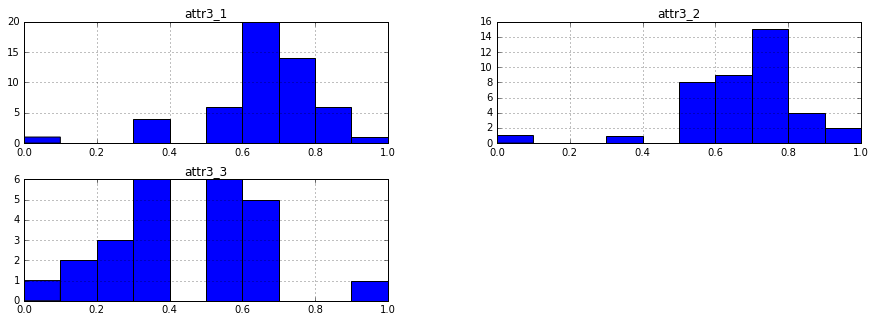

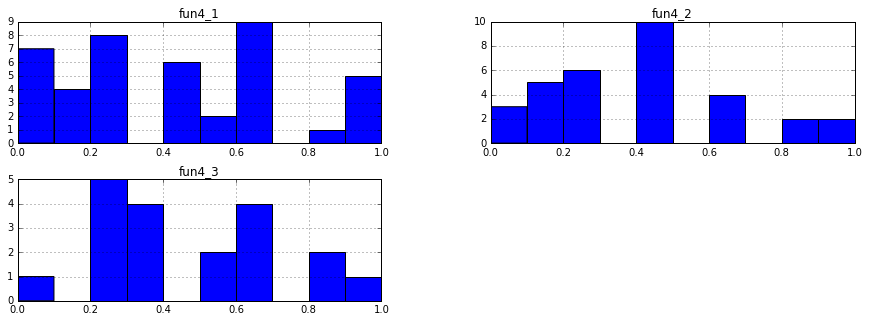

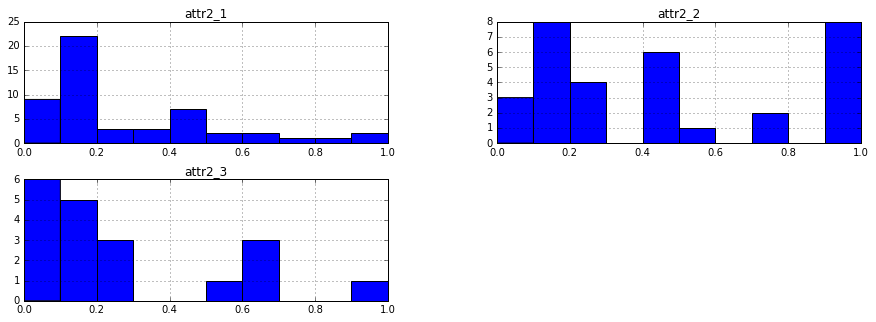

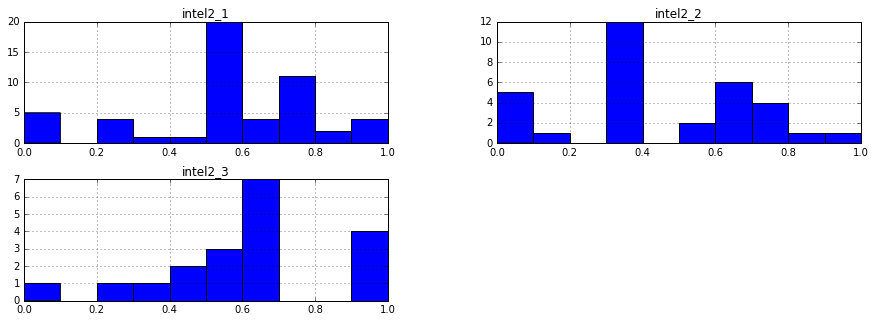

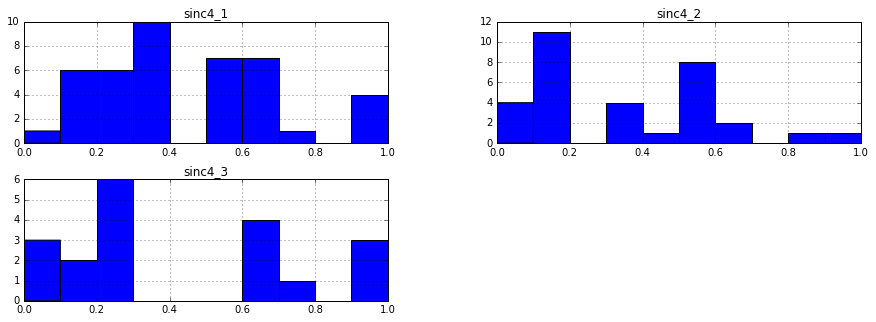

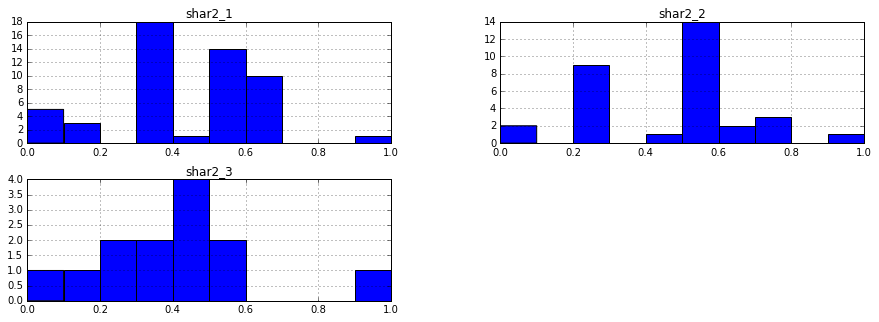

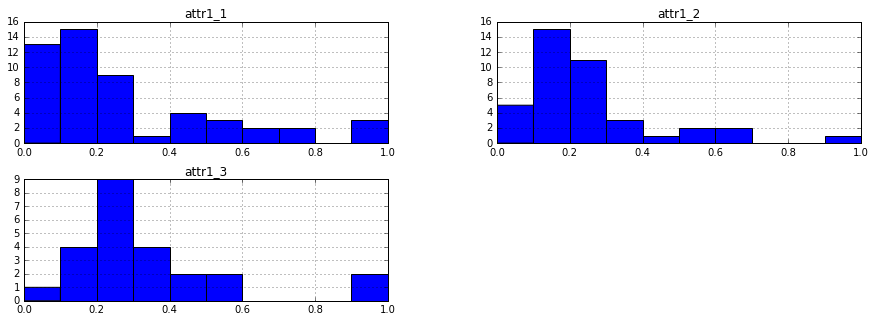

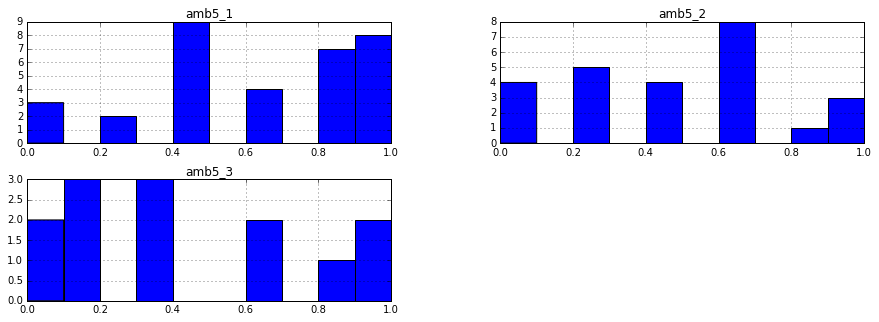

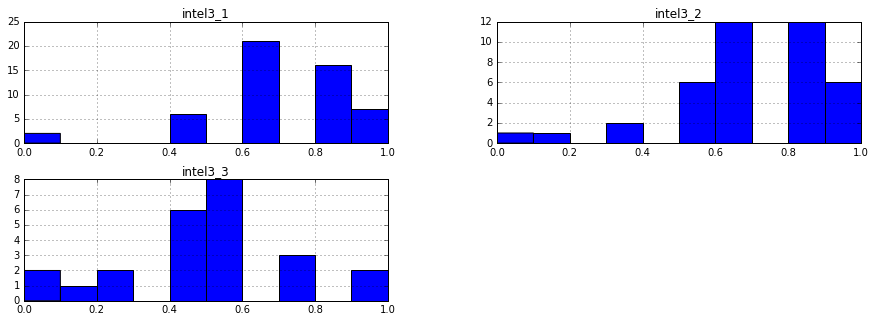

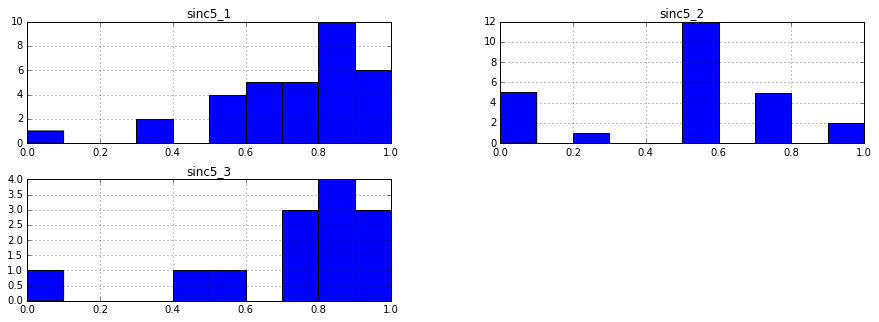

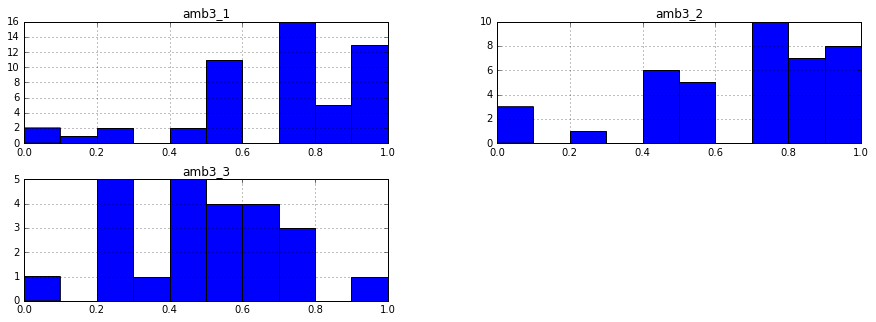

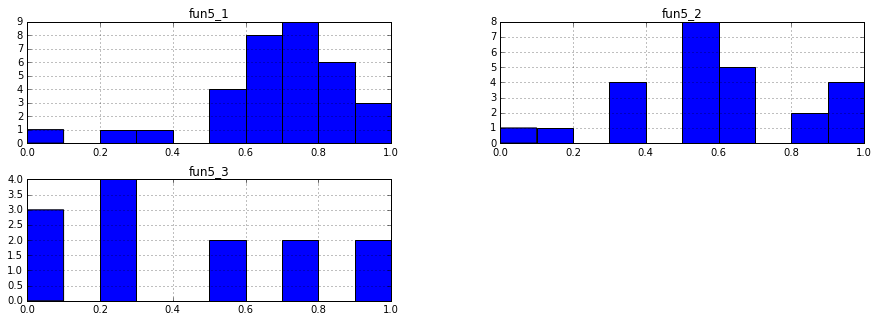

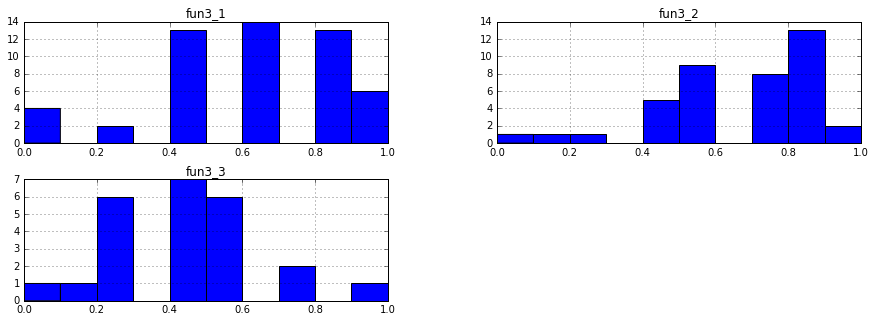

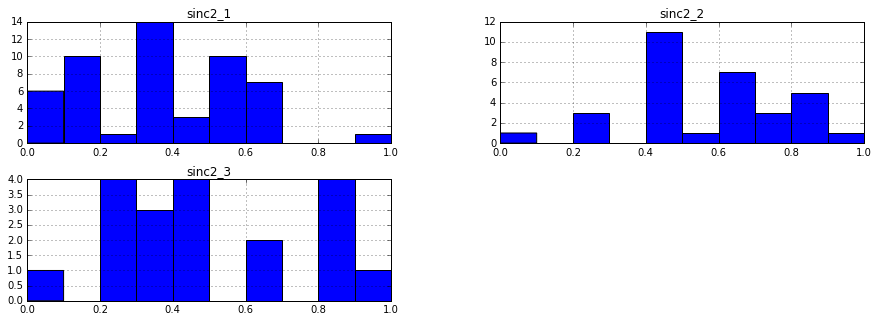

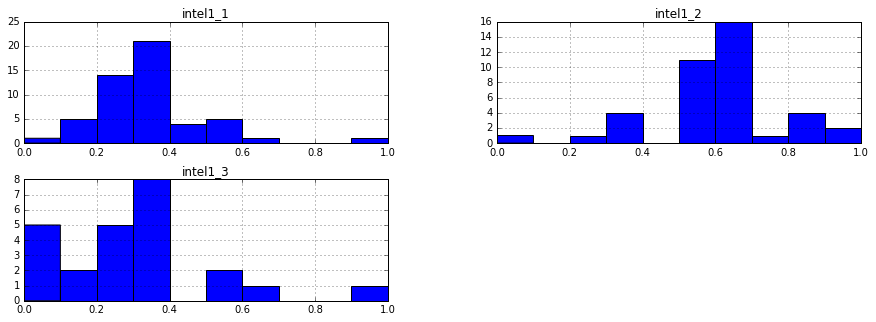

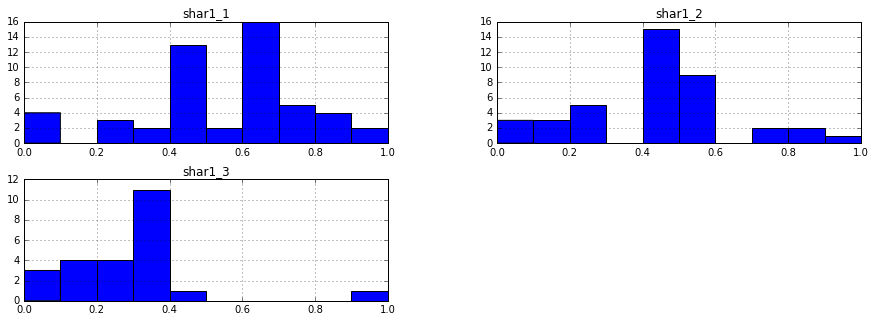

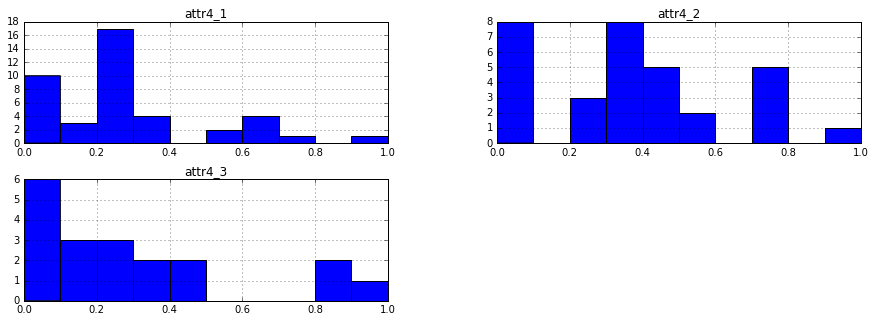

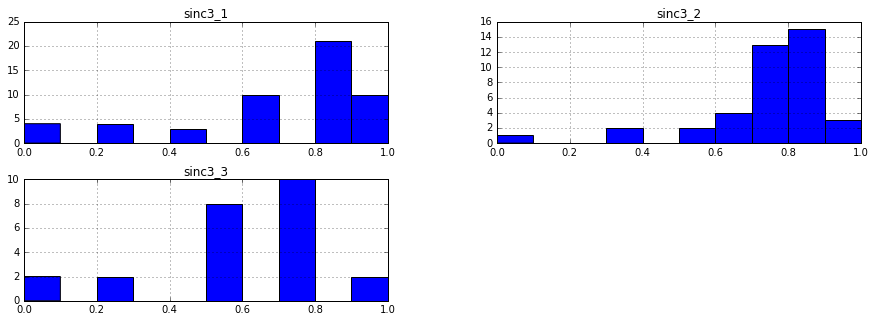

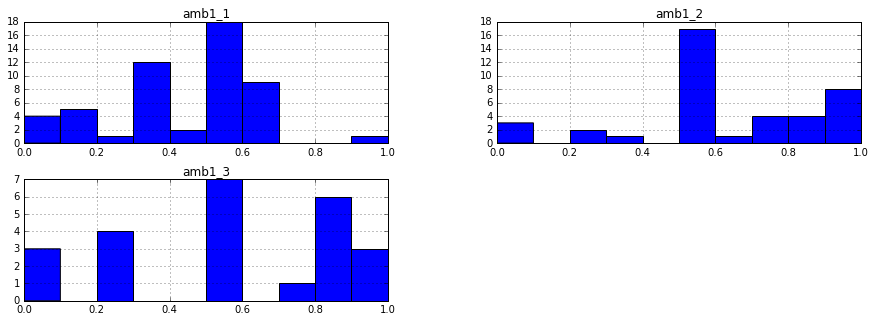

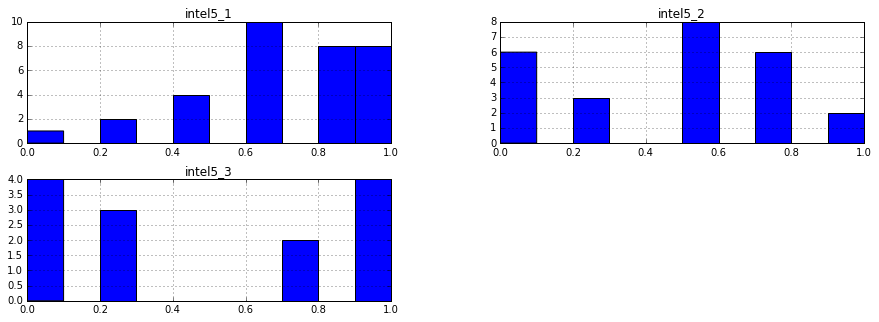

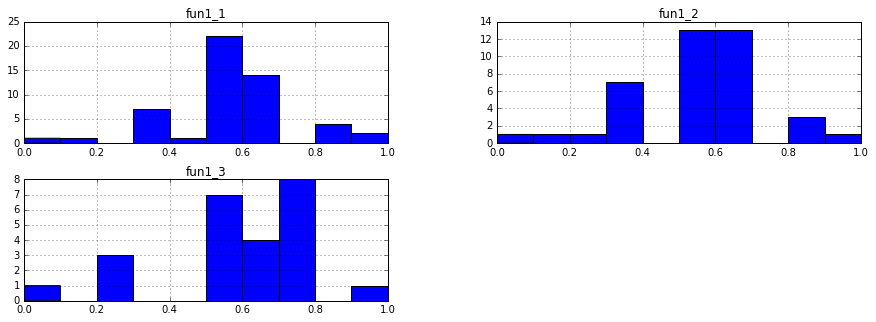

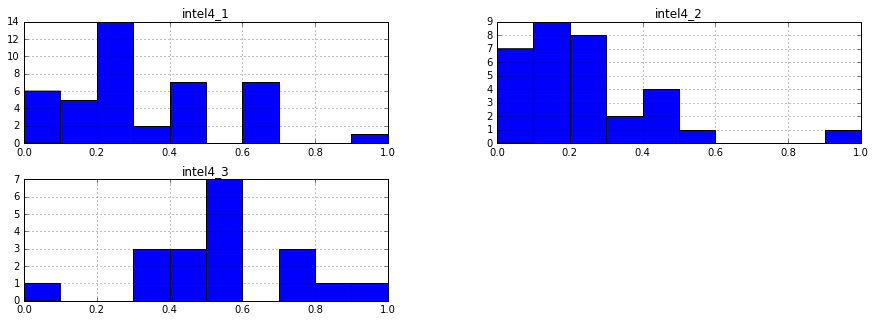

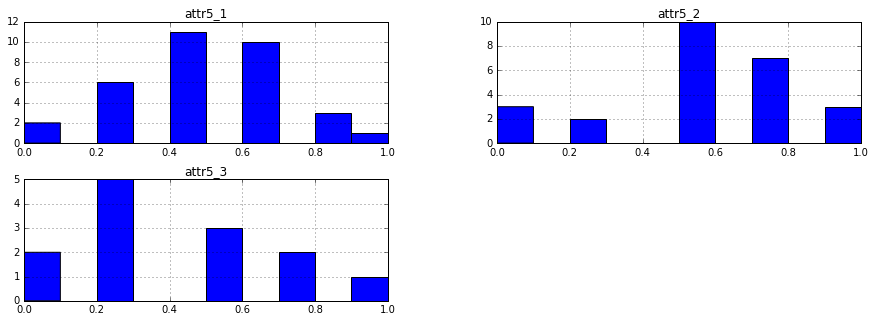

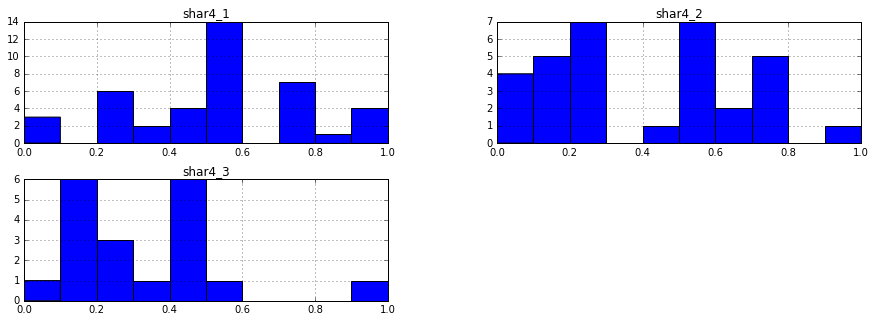

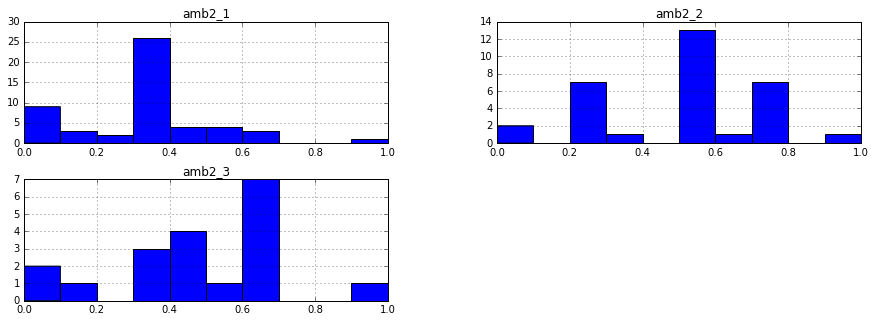

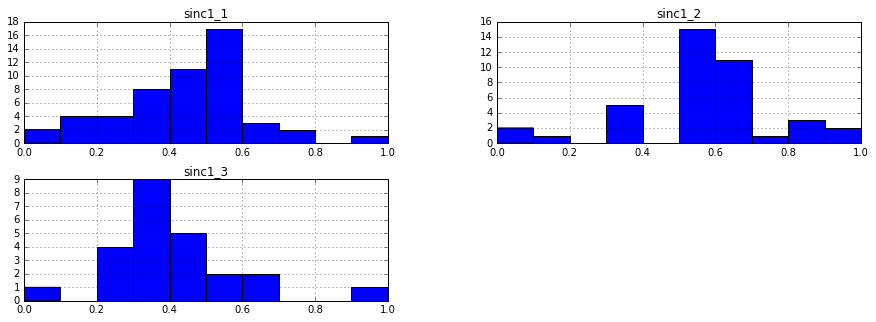

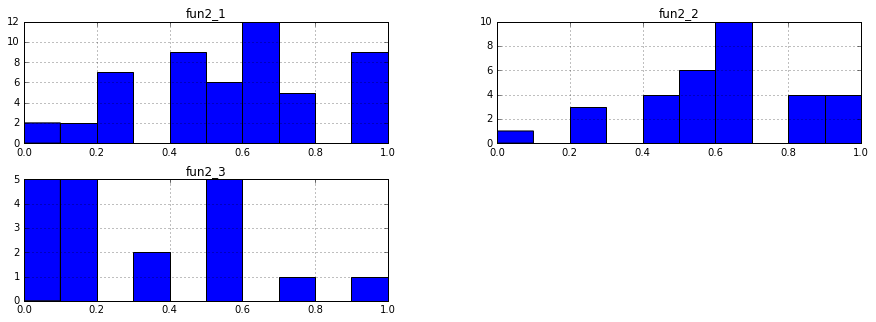

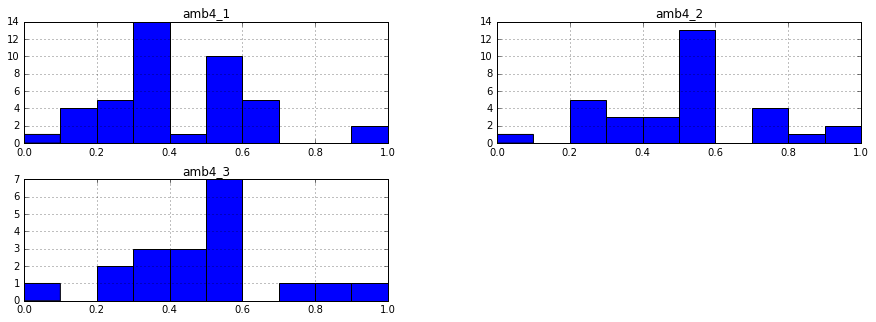

In [14]:
for i, j in fc.master_list.iteritems():
    stuff = pd.DataFrame(data = people_not_matched.drop_duplicates(subset = 'iid', keep = 'first'), columns = ['iid', 'wave', 'gender'] + j)
    new_frame = stuff[stuff['gender'] == 0].copy()
    new_frame.drop(labels = ['iid', 'gender', 'wave'], axis = 1, inplace = True)
    for i in new_frame.columns:
        new_frame[i] = (new_frame[i] - new_frame[i].min()) / (new_frame[i].max() - new_frame[i].min())
    display(new_frame.describe())
    new_frame.hist(bins = 10, figsize = (15, 5))

<h2>Non-Matched Males: Graphs</h2>

,attr3_1,attr3_2,attr3_3
count,46.000000,39.000000,13.000000
mean,0.757246,0.452991,0.523077
std,0.257496,0.232419,0.289119
min,0.000000,0.000000,0.000000
25%,0.666667,0.333333,0.400000
50%,0.833333,0.500000,0.600000
75%,1.000000,0.666667,0.600000
max,1.000000,1.000000,1.000000


,fun4_1,fun4_2,fun4_3
count,32.000000,27.000000,9.000000
mean,0.455000,0.388148,0.438889
std,0.277268,0.267597,0.387925
min,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.150000
50%,0.400000,0.400000,0.200000
75%,0.650000,0.600000,0.750000
max,1.000000,1.000000,1.000000


,attr2_1,attr2_2,attr2_3
count,46.000000,27.000000,9.000000
mean,0.346103,0.169220,0.421053
std,0.234271,0.223572,0.374942
min,0.000000,0.000000,0.000000
25%,0.209813,0.029470,0.105263
50%,0.250000,0.090909,0.473684
75%,0.375000,0.204545,0.473684
max,1.000000,1.000000,1.000000


,intel2_1,intel2_2,intel2_3
count,46.000000,27.000000,9.000000
mean,0.387587,0.423556,0.481481
std,0.167944,0.400931,0.364810
min,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.200000
50%,0.375000,0.500000,0.333333
75%,0.500000,0.782500,0.666667
max,1.000000,1.000000,1.000000


,sinc4_1,sinc4_2,sinc4_3
count,32.000000,27.000000,9.000000
mean,0.354464,0.611111,0.355556
std,0.194846,0.279537,0.348010
min,0.000000,0.000000,0.000000
25%,0.242857,0.400000,0.133333
50%,0.285714,0.500000,0.266667
75%,0.428571,0.800000,0.666667
max,1.000000,1.000000,1.000000


,shar2_1,shar2_2,shar2_3
count,46.000000,27.000000,5.000000
mean,0.407703,0.453457,0.200000
std,0.221035,0.248444,0.447214
min,0.000000,0.000000,0.000000
25%,0.333333,0.333333,0.000000
50%,0.384000,0.500000,0.000000
75%,0.502250,0.636333,0.000000
max,1.000000,1.000000,1.000000


,attr1_1,attr1_2,attr1_3
count,46.000000,39.000000,13.000000
mean,0.438916,0.289524,0.282923
std,0.252847,0.230489,0.324857
min,0.000000,0.000000,0.000000
25%,0.294118,0.139357,0.051200
50%,0.376471,0.214286,0.200000
75%,0.647059,0.428571,0.400000
max,1.000000,1.000000,1.000000


,amb5_1,amb5_2,amb5_3
count,26.000000,21.000000,5.000000
mean,0.675214,0.507937,0.440000
std,0.259007,0.300353,0.384708
min,0.000000,0.000000,0.000000
25%,0.555556,0.333333,0.200000
50%,0.666667,0.500000,0.400000
75%,0.888889,0.666667,0.600000
max,1.000000,1.000000,1.000000


,intel3_1,intel3_2,intel3_3
count,46.000000,39.000000,13.000000
mean,0.706522,0.700855,0.692308
std,0.193042,0.242367,0.262168
min,0.000000,0.000000,0.000000
25%,0.666667,0.666667,0.666667
50%,0.666667,0.666667,0.666667
75%,0.833333,0.833333,0.833333
max,1.000000,1.000000,1.000000


,sinc5_1,sinc5_2,sinc5_3
count,26.000000,21.000000,5.000000
mean,0.641026,0.492063,0.466667
std,0.265382,0.318312,0.505525
min,0.000000,0.000000,0.000000
25%,0.541667,0.166667,0.000000
50%,0.666667,0.500000,0.333333
75%,0.833333,0.833333,1.000000
max,1.000000,1.000000,1.000000


,amb3_1,amb3_2,amb3_3
count,46.000000,39.000000,13.000000
mean,0.565217,0.622711,0.576923
std,0.321029,0.279033,0.351026
min,0.000000,0.000000,0.000000
25%,0.333333,0.428571,0.333333
50%,0.666667,0.714286,0.666667
75%,0.833333,0.857143,0.833333
max,1.000000,1.000000,1.000000


,fun5_1,fun5_2,fun5_3
count,26.000000,21.000000,5.00000
mean,0.596154,0.585034,0.45000
std,0.300640,0.292438,0.37081
min,0.000000,0.000000,0.00000
25%,0.375000,0.428571,0.25000
50%,0.625000,0.571429,0.50000
75%,0.875000,0.714286,0.50000
max,1.000000,1.000000,1.00000


,fun3_1,fun3_2,fun3_3
count,46.000000,39.000000,13.000000
mean,0.663043,0.589744,0.564103
std,0.223404,0.260503,0.337052
min,0.000000,0.000000,0.000000
25%,0.500000,0.428571,0.333333
50%,0.750000,0.571429,0.666667
75%,0.875000,0.714286,0.833333
max,1.000000,1.000000,1.000000


,sinc2_1,sinc2_2,sinc2_3
count,46.000000,27.000000,9.000000
mean,0.327626,0.452185,0.418803
std,0.191849,0.182362,0.398056
min,0.000000,0.000000,0.000000
25%,0.200000,0.375000,0.076923
50%,0.300000,0.489250,0.230769
75%,0.400000,0.500000,0.615385
max,1.000000,1.000000,1.000000


,intel1_1,intel1_2,intel1_3
count,46.000000,39.000000,13.000000
mean,0.375894,0.314879,0.328205
std,0.182385,0.190929,0.237548
min,0.000000,0.000000,0.000000
25%,0.285714,0.142857,0.166667
50%,0.428571,0.285714,0.333333
75%,0.428571,0.428571,0.364333
max,1.000000,1.000000,1.000000


,shar1_1,shar1_2,shar1_3
count,46.000000,39.000000,13.000000
mean,0.467235,0.479559,0.662654
std,0.299806,0.310162,0.270461
min,0.000000,0.000000,0.000000
25%,0.230000,0.200000,0.697500
50%,0.432600,0.476000,0.750000
75%,0.630900,0.681400,0.750000
max,1.000000,1.000000,1.000000


,attr4_1,attr4_2,attr4_3
count,32.000000,27.000000,9.000000
mean,0.315179,0.269692,0.178451
std,0.225729,0.261366,0.319512
min,0.000000,0.000000,0.000000
25%,0.196429,0.119718,0.000000
50%,0.285714,0.225352,0.090909
75%,0.428571,0.401408,0.166667
max,1.000000,1.000000,1.000000


,sinc3_1,sinc3_2,sinc3_3
count,46.000000,39.000000,13.000000
mean,0.721014,0.600000,0.784615
std,0.213883,0.255467,0.264090
min,0.000000,0.000000,0.000000
25%,0.666667,0.400000,0.800000
50%,0.666667,0.600000,0.800000
75%,0.833333,0.800000,1.000000
max,1.000000,1.000000,1.000000


,amb1_1,amb1_2,amb1_3
count,46.000000,39.000000,13.000000
mean,0.408924,0.468460,0.516539
std,0.290773,0.315504,0.343861
min,0.000000,0.000000,0.000000
25%,0.241000,0.269946,0.316656
50%,0.500000,0.599880,0.633312
75%,0.575000,0.599880,0.736542
max,1.000000,1.000000,1.000000


,intel5_1,intel5_2,intel5_3
count,26.000000,21.000000,5.000000
mean,0.641026,0.634921,0.500000
std,0.261161,0.281953,0.467707
min,0.000000,0.000000,0.000000
25%,0.500000,0.500000,0.000000
50%,0.666667,0.666667,0.750000
75%,0.791667,0.833333,0.750000
max,1.000000,1.000000,1.000000


,fun1_1,fun1_2,fun1_3
count,46.000000,39.000000,13.000000
mean,0.575370,0.638246,0.720460
std,0.206425,0.222647,0.256113
min,0.000000,0.000000,0.000000
25%,0.500000,0.492600,0.716675
50%,0.650833,0.680000,0.716675
75%,0.666667,0.800000,0.838032
max,1.000000,1.000000,1.000000


,intel4_1,intel4_2,intel4_3
count,32.000000,27.000000,9.000000
mean,0.345536,0.568519,0.458333
std,0.223015,0.273562,0.421586
min,0.000000,0.000000,0.000000
25%,0.192857,0.375000,0.187500
50%,0.285714,0.500000,0.312500
75%,0.428571,0.750000,1.000000
max,1.000000,1.000000,1.000000


,attr5_1,attr5_2,attr5_3
count,26.000000,21.000000,5.000000
mean,0.604396,0.444444,0.720000
std,0.268959,0.265274,0.414729
min,0.000000,0.000000,0.000000
25%,0.571429,0.333333,0.800000
50%,0.714286,0.500000,0.800000
75%,0.714286,0.666667,1.000000
max,1.000000,1.000000,1.000000


,shar4_1,shar4_2,shar4_3
count,32.00000,27.000000,9.000000
mean,0.48875,0.406173,0.544444
std,0.26895,0.256878,0.439065
min,0.00000,0.000000,0.000000
25%,0.31000,0.216667,0.200000
50%,0.40000,0.333333,0.300000
75%,0.65000,0.666667,1.000000
max,1.00000,1.000000,1.000000


,amb2_1,amb2_2,amb2_3
count,46.000000,27.000000,9.000000
mean,0.527930,0.508874,0.506944
std,0.244113,0.202459,0.317836
min,0.000000,0.000000,0.000000
25%,0.400000,0.400000,0.312500
50%,0.400000,0.500000,0.687500
75%,0.800000,0.600000,0.687500
max,1.000000,1.000000,1.000000


,sinc1_1,sinc1_2,sinc1_3
count,46.000000,39.000000,13.000000
mean,0.400733,0.598573,0.439333
std,0.211268,0.248276,0.361566
min,0.000000,0.000000,0.000000
25%,0.285714,0.416667,0.240000
50%,0.428571,0.633333,0.333333
75%,0.448500,0.690500,0.666667
max,1.000000,1.000000,1.000000


,fun2_1,fun2_2,fun2_3
count,46.000000,27.000000,9.000000
mean,0.536313,0.432389,0.512821
std,0.270679,0.182571,0.424822
min,0.000000,0.000000,0.000000
25%,0.400000,0.375000,0.153846
50%,0.592200,0.416750,0.615385
75%,0.642900,0.500000,1.000000
max,1.000000,1.000000,1.000000


,amb4_1,amb4_2,amb4_3
count,32.000000,27.000000,9.000000
mean,0.443750,0.320988,0.318519
std,0.314886,0.207786,0.322796
min,0.000000,0.000000,0.000000
25%,0.237500,0.166667,0.133333
50%,0.500000,0.333333,0.200000
75%,0.750000,0.333333,0.333333
max,1.000000,1.000000,1.000000


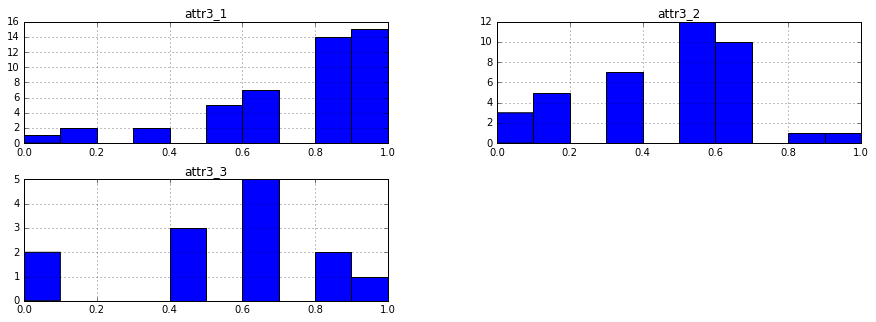

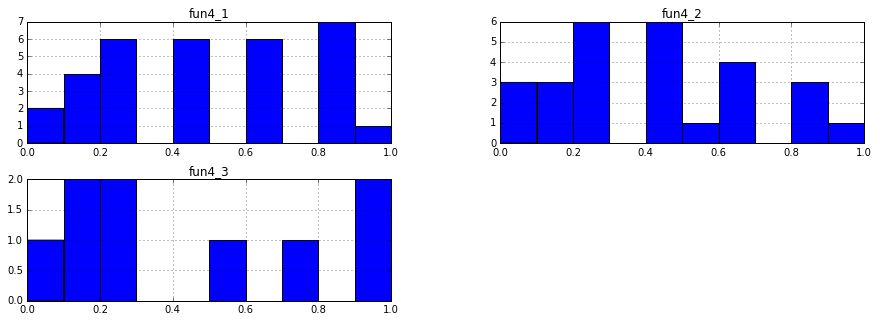

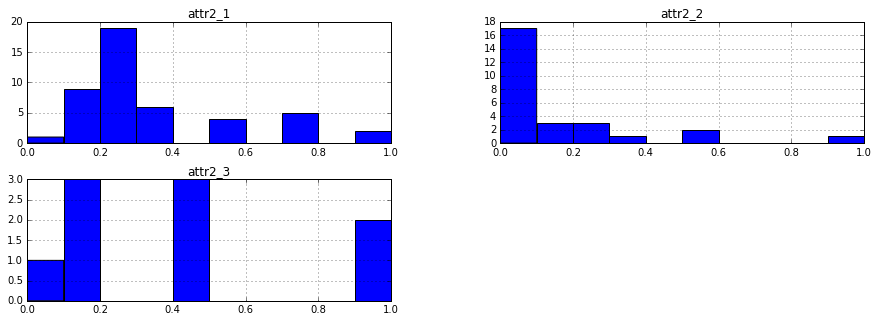

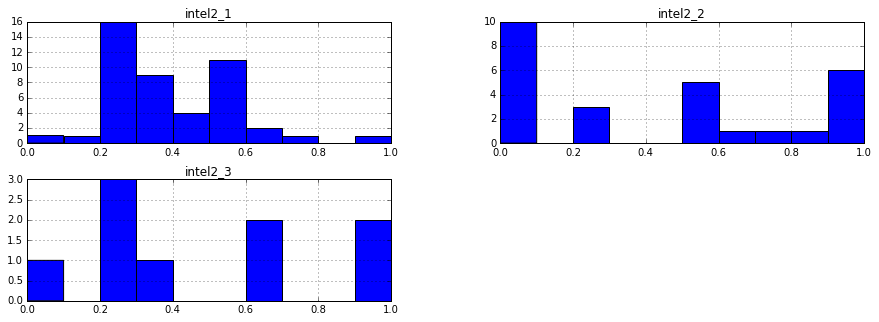

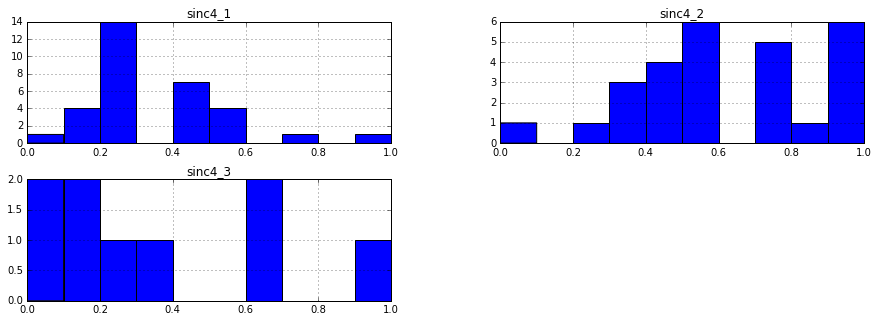

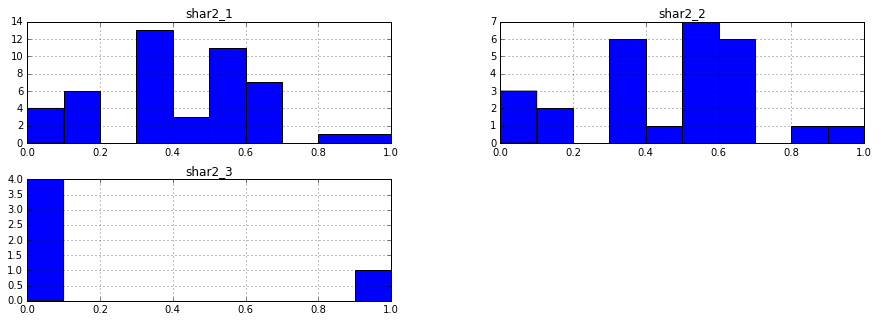

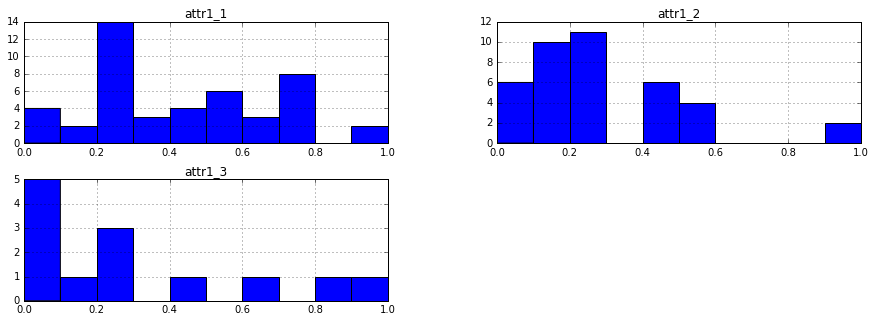

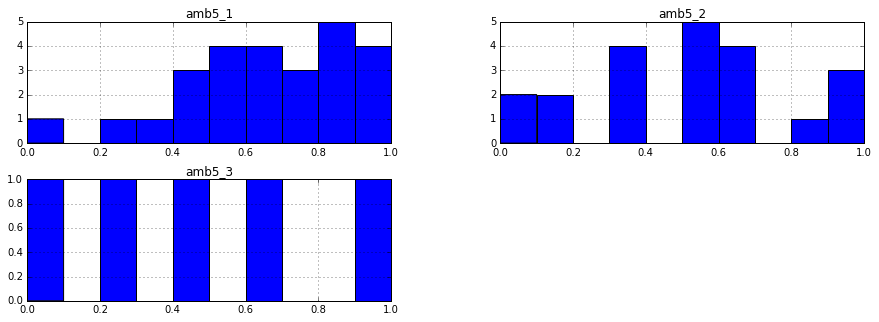

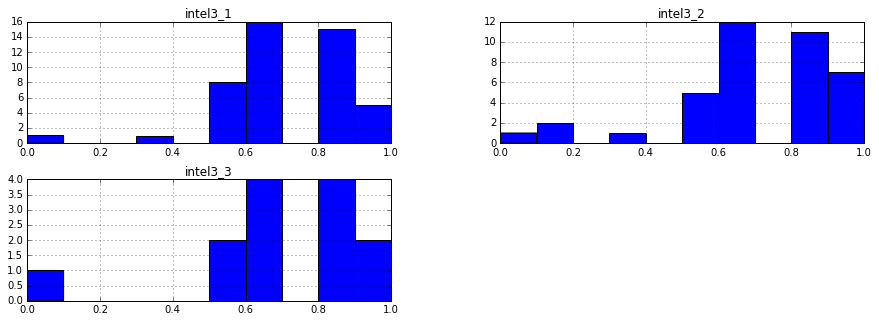

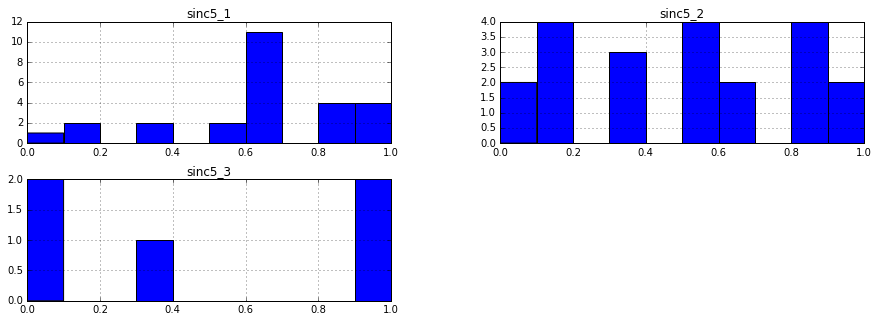

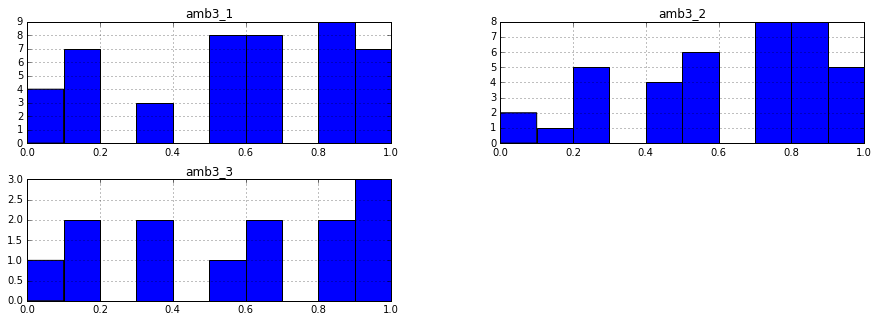

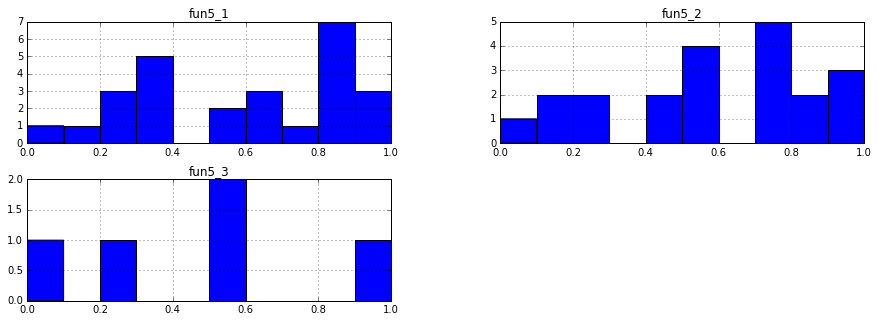

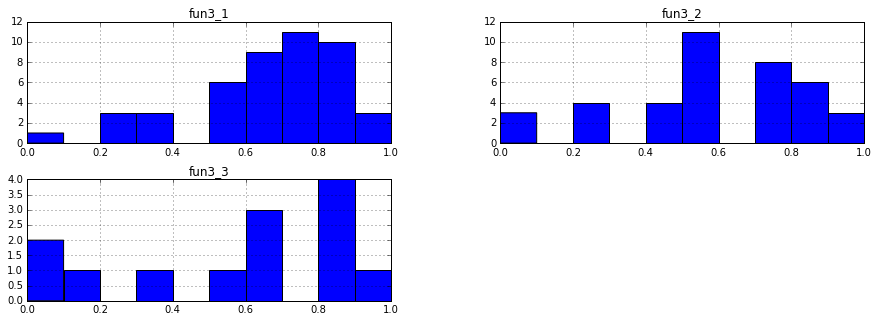

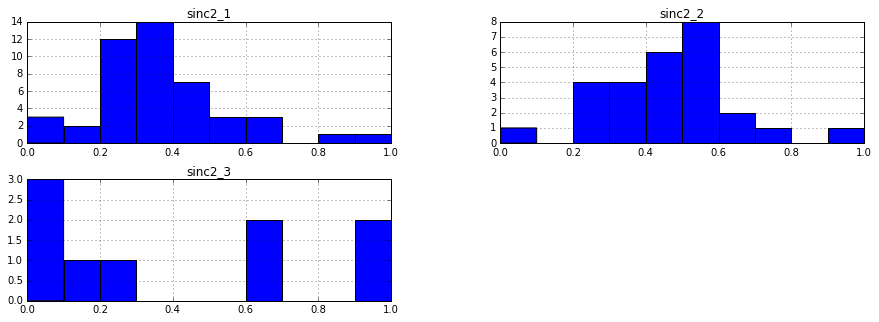

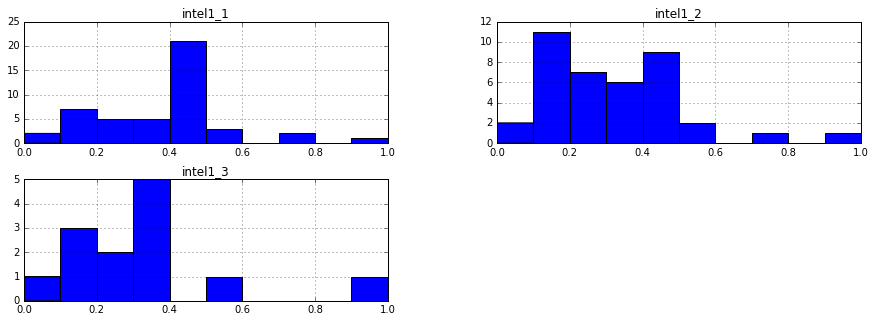

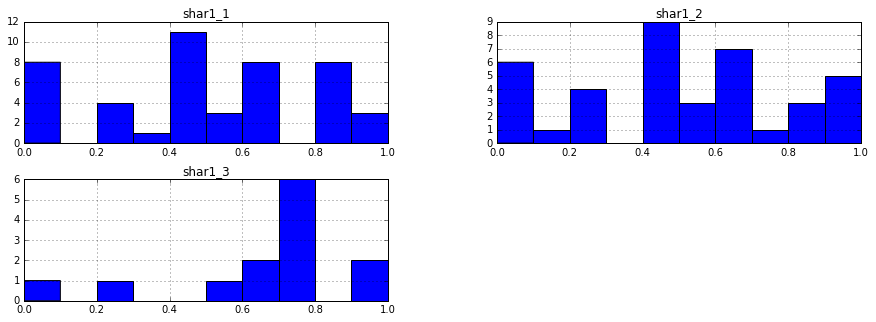

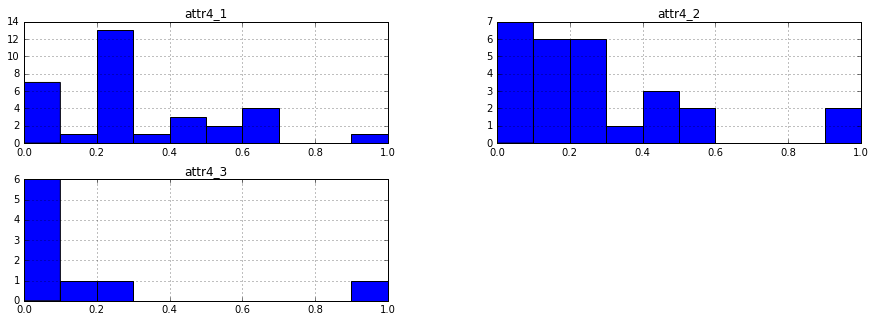

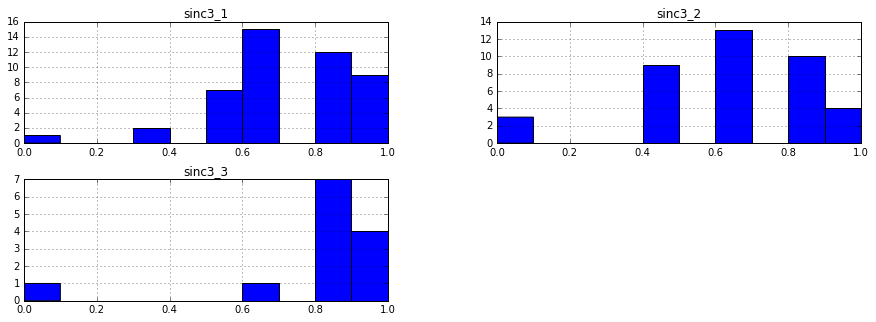

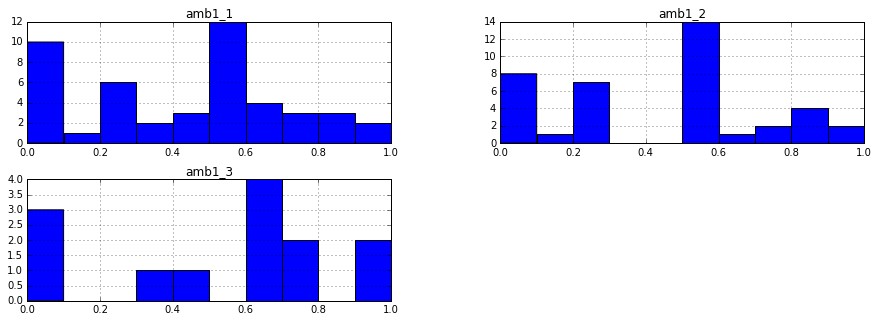

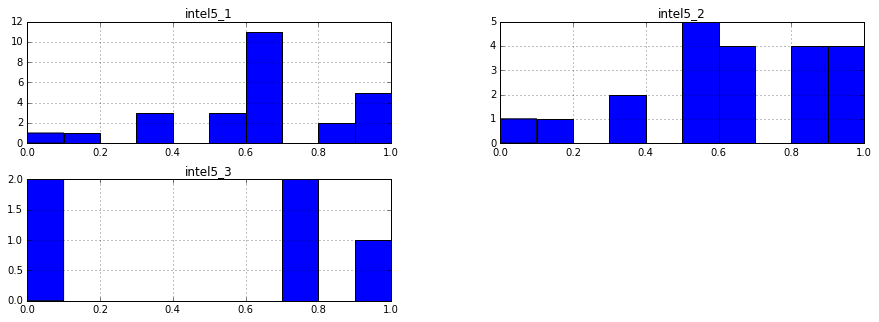

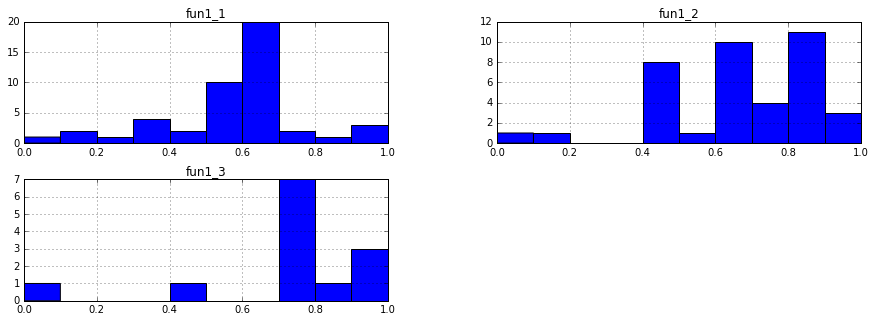

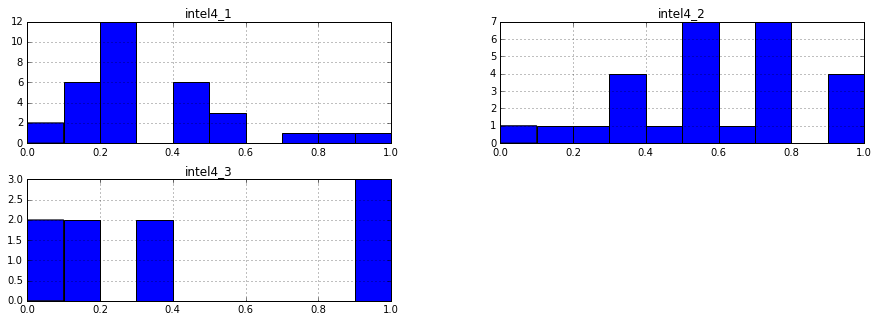

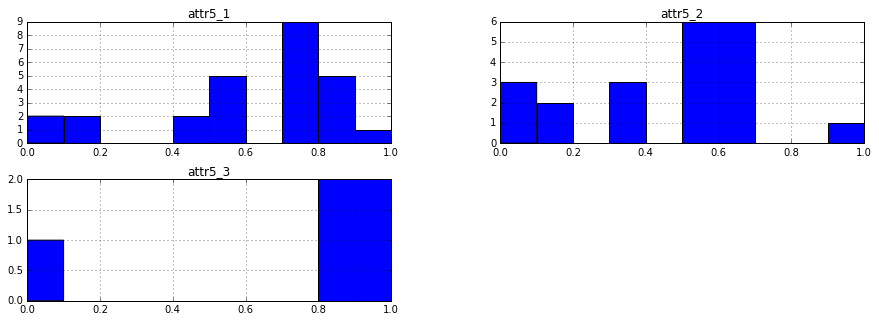

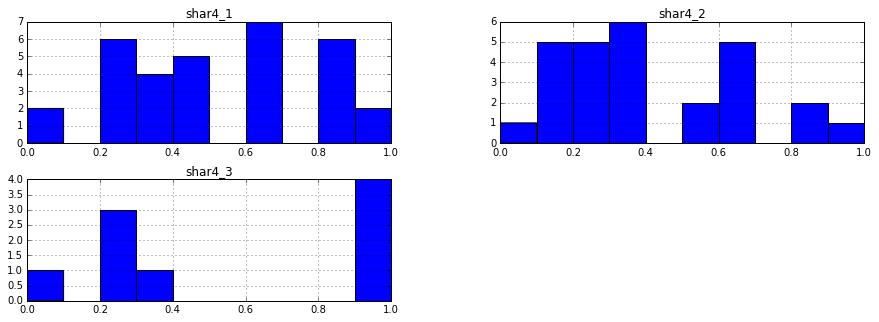

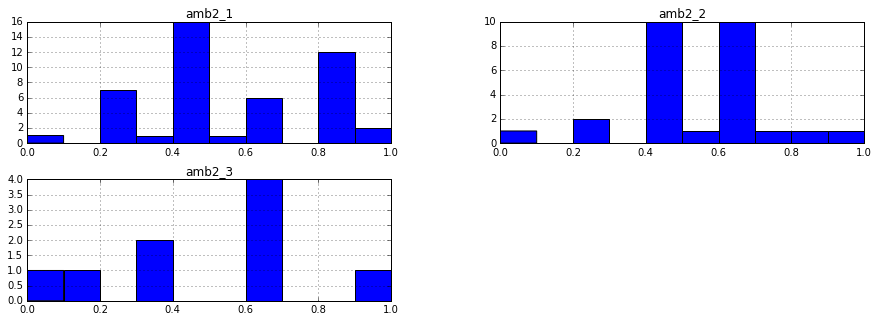

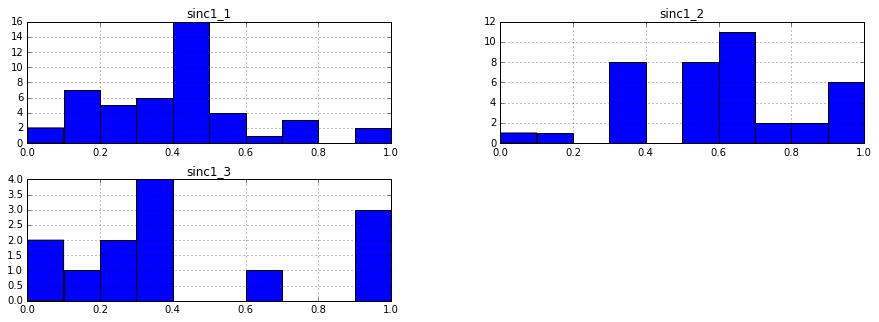

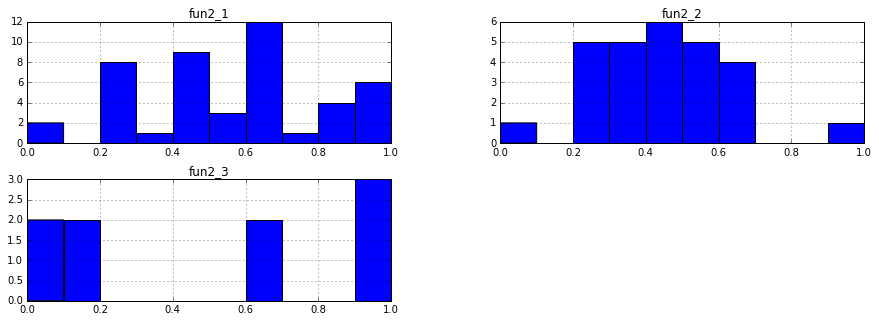

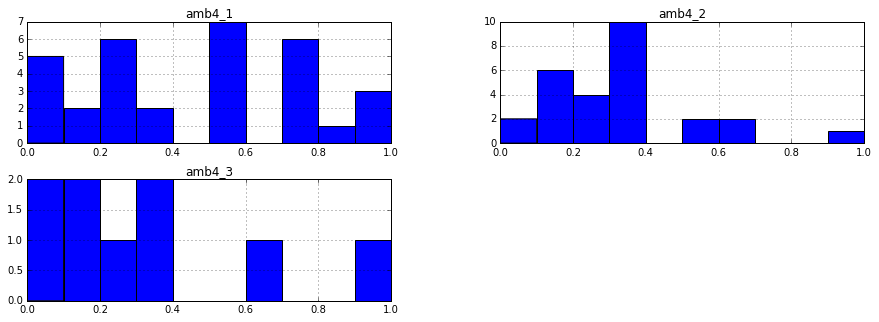

In [15]:
for i, j in fc.master_list.iteritems():
    stuff = pd.DataFrame(data = people_not_matched.drop_duplicates(subset = 'iid', keep = 'first'), columns = ['iid', 'wave', 'gender'] + j)
    new_frame = stuff[stuff['gender'] == 1].copy()
    new_frame.drop(labels = ['iid', 'gender', 'wave'], axis = 1, inplace = True)
    for i in new_frame.columns:
        new_frame[i] = (new_frame[i] - new_frame[i].min()) / (new_frame[i].max() - new_frame[i].min())
    display(new_frame.describe())
    new_frame.hist(bins = 10, figsize = (15, 5))

<h1>Features</h1>

In [16]:
for i, j in fc.data_cleaner.iteritems():
    print i, j, '\n'
for i, j in fc.master_list.items():
    print i, j, '\n'
print 'clean_up_1', '\n', fc.clean_up_1, '\n'
print 'clean_up_2', '\n', fc.clean_up_2, '\n'
print 'clean_up_3', '\n', fc.clean_up_3, '\n'
print 'clean_up_4', '\n', fc.clean_up_4, '\n'
print 'clean_up_5', '\n', fc.clean_up_5, '\n'

first_round ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1'] 

second_round ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2', 'attr2_2', 'sinc2_2', 'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2', 'attr4_2', 'sinc4_2', 'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2'] 

third_round ['attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3', 'amb1_3', 'shar1_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3', 'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3', 'amb4_3', 'shar4_3', 'attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'] 

how_you_measure_attr ['attr3_1', 'attr3_2', '